# Visualizing Earning Based on College Majors

## ...and that magic code to change your college major and thus, your life, forever (maybe).

I was playing an online game with my imaginary colleagues when one of them whispered to me (in-game, of course. We're still on physical distancing rule here).

Imaginary Colleague: "Let me tell you a secret."

Me: "What is it?"

Imaginary Colleague: "I found this magic code that lets you change your college major, and at that one given chance, you can choose to either redo your life with your newly chosen major, or just continue with your life, earnings and all, with your current major."

Me: "You drunk?"

Imaginary Colleague: "Nope. Well, it's up to you. You can do some research on which majors earn money the most, or something like that."

Me: "Have you tried it?"

Imaginary Colleague: "Well... what do you think?"

Me: "...no way, dudette. No way."

She can't be serious. But knowing her, she **might** be serious.

Imaginary Colleague: "No harm on at least checking on some college majors, right? I know you're still into that astronomy thing."

Me: "OK. Now you've got my attention here."

Imaginary Colleague: "Well, I'm ready whenever you're ready."

Well, it's harmless to just *do* some research, right? 
- Should I enroll in popular majors if my quick research shown that they make more money? 
- What majors have the most students, and should I avoid them to lower my competition rate once I graduated? 
- Should I care about gender diversity? 

OK stop, I've been thinking too much about it. It's not like I believe her nonsense or something like that, but... anyway, let's just try it.

I have this dataset from [American Community Survey](https://www.census.gov/programs-surveys/acs/) about the job outcomes of students who graduated from college between 2010 and 2012. That's exactly the year I graduated from college! Somehow it's getting scary. There's a cleaned version from FiveThirtyEight which were released on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors), so let's just use this one.

Some of the column names are not that intuitive nor self-explanatory, so I'll jot them here for easy reference:
- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

---

## I'm feeling hesitant, but a little exploration won't hurt, right?

In [2]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')

In [3]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
recent_grads.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [5]:
recent_grads.tail(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
163,164,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,38279.0,1225.0,37054.0,Health,0.967998,95,29763,...,13862,14460,1487,0.047584,28000,20000,40000,19957,9404,5125
164,165,2307,EARLY CHILDHOOD EDUCATION,37589.0,1167.0,36422.0,Education,0.968954,342,32551,...,7001,20748,1360,0.040105,28000,21000,35000,23515,7705,2868
165,166,2603,OTHER FOREIGN LANGUAGES,11204.0,3472.0,7732.0,Humanities & Liberal Arts,0.690111,56,7052,...,3685,3214,846,0.107116,27500,22900,38000,2326,3703,1115
166,167,6001,DRAMA AND THEATER ARTS,43249.0,14440.0,28809.0,Arts,0.666119,357,36165,...,15994,16891,3040,0.077541,27000,19200,35000,6994,25313,11068
167,168,3302,COMPOSITION AND RHETORIC,18953.0,7022.0,11931.0,Humanities & Liberal Arts,0.629505,151,15053,...,6612,7832,1340,0.081742,27000,20000,35000,4855,8100,3466
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


A quick glance on these tables already shown that the highest median earnings are coming from STEM-related fields. 

In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
raw_data_count = recent_grads.count()
raw_data_count

Rank                    173
Major_code              173
Major                   173
Total                   172
Men                     172
Women                   172
Major_category          173
ShareWomen              172
Sample_size             173
Employed                173
Full_time               173
Part_time               173
Full_time_year_round    173
Unemployed              173
Unemployment_rate       173
Median                  173
P25th                   173
P75th                   173
College_jobs            173
Non_college_jobs        173
Low_wage_jobs           173
dtype: int64

Oh, I spotted some discrepancy in the rows, so let's drop the missing values. I'm planning to visualize my findings, so I need to make sure the lengths are matched to avoid errors.

In [8]:
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.count()
cleaned_data_count

Rank                    172
Major_code              172
Major                   172
Total                   172
Men                     172
Women                   172
Major_category          172
ShareWomen              172
Sample_size             172
Employed                172
Full_time               172
Part_time               172
Full_time_year_round    172
Unemployed              172
Unemployment_rate       172
Median                  172
P25th                   172
P75th                   172
College_jobs            172
Non_college_jobs        172
Low_wage_jobs           172
dtype: int64

---

## ...because I had a thing with scatter plots (don't judge me)

I think the following for relations are worth to look at:
- Good for a start: `Sample_size` and `Median`, also its relation with `Unemployment_rate`. 
- The most important relation to me: `Full_time` and `Median` relation. 
- As a woman, these relations also interest me: `ShareWomen` and `Unemployment_rate`, also how gender (`Men` and `Women`) related with `Median`.

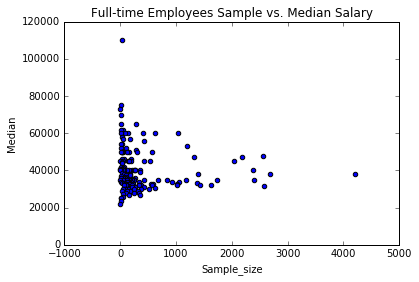

In [59]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Full-time Employees Sample vs. Median Salary')

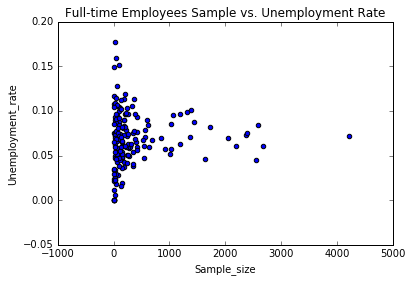

In [60]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Full-time Employees Sample vs. Unemployment Rate')

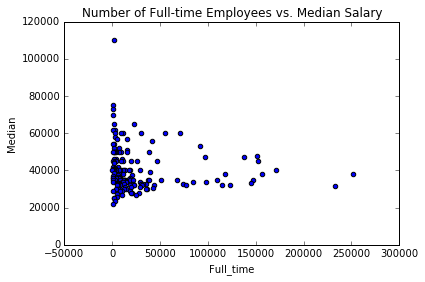

In [64]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Number of Full-time Employees vs. Median Salary')

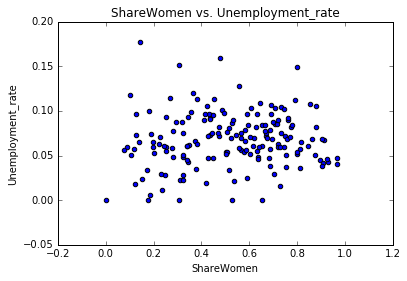

In [12]:
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax.set_title('ShareWomen vs. Unemployment_rate')

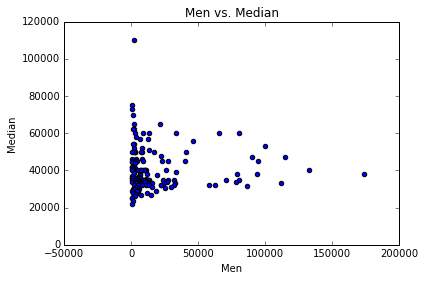

In [13]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Men vs. Median')

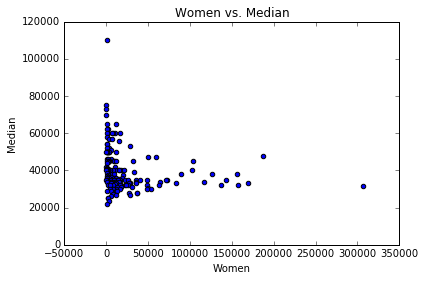

In [14]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Women vs. Median')

There seems to be no significant relationships between the data points in these scatter plots.

---

## Hi, Histogram :)

Let's check the data points by using the histogram.

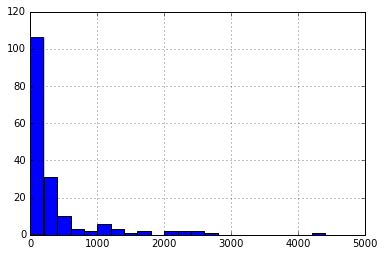

In [10]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

Let's tweak the bin sizes and ranges a little bit.

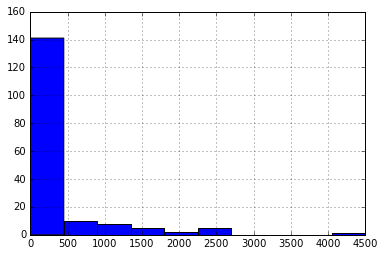

In [70]:
recent_grads['Sample_size'].hist(range=(0,4500))

Most of the `Sample_size` is below 500, which means that this data may not be representative enough.

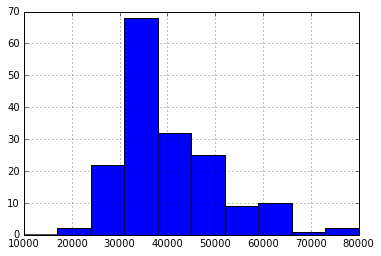

In [69]:
recent_grads['Median'].hist(range=(10000,80000))

So, the most common median salary range is $30,000-40,000. I must say my earnings is not common enough, then.

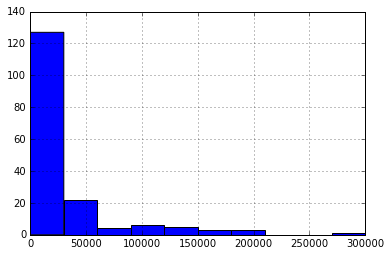

In [68]:
recent_grads['Employed'].hist(range=(0,300000))

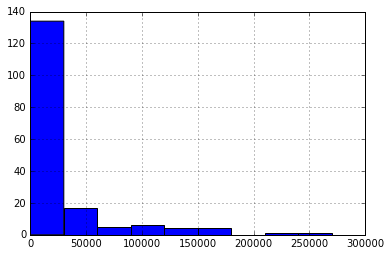

In [78]:
recent_grads['Full_time'].hist(range=(0,300000))

The `Full_time` resembles the `Employed` chart, which makes sense.

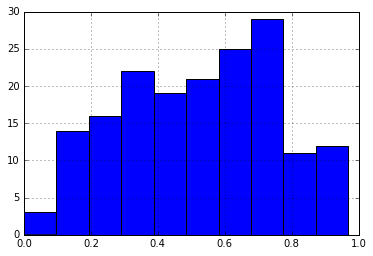

In [80]:
recent_grads['ShareWomen'].hist()

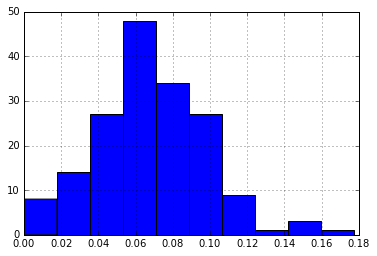

In [81]:
recent_grads['Unemployment_rate'].hist()

The most common percentage of unemployment rate is 5.5-7%.

Let's see what majors belong to this range.

In [122]:
common_unemployment = recent_grads[recent_grads["Unemployment_rate"].between(0.055,0.070)]
common_unemployment.sort_values(by='Unemployment_rate', ascending=False).head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
121,122,6106,HEALTH AND MEDICAL PREPARATORY PROGRAMS,12740.0,5521.0,7219.0,Health,0.566641,31,7052,...,3891,3236,529,0.069780,33500,23000,40000,3051,3539,1159
40,41,6201,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.524153,2042,165527,...,27693,123169,12411,0.069749,45000,34000,56000,11417,39323,10886
96,97,1902,JOURNALISM,72619.0,23736.0,48883.0,Communications & Journalism,0.673143,843,61022,...,15902,39524,4535,0.069176,35000,26000,42900,23279,26672,8512
101,102,3608,PHYSIOLOGY,22060.0,8422.0,13638.0,Biology & Life Science,0.618223,99,14643,...,6541,7588,1088,0.069163,35000,20000,50000,6587,6894,2237
151,152,5404,SOCIAL WORK,53552.0,5137.0,48415.0,Psychology & Social Work,0.904075,374,45038,...,13481,27588,3329,0.068828,30000,25000,35000,27449,14416,4344
103,104,4002,NUTRITION SCIENCES,18909.0,2563.0,16346.0,Health,0.864456,118,13217,...,6648,6625,975,0.068701,35000,26000,45000,6535,5473,2449
157,158,3402,HUMANITIES,6652.0,2013.0,4639.0,Humanities & Liberal Arts,0.697384,49,5052,...,2225,2661,372,0.068584,30000,20000,49000,1168,3354,1141
98,99,1904,ADVERTISING AND PUBLIC RELATIONS,53162.0,12862.0,40300.0,Communications & Journalism,0.758060,681,45326,...,10948,30932,3305,0.067961,35000,27000,47000,9659,23059,7214
150,151,2901,FAMILY AND CONSUMER SCIENCES,58001.0,5166.0,52835.0,Industrial Arts & Consumer Services,0.910933,518,46624,...,15872,26906,3355,0.067128,30000,22900,40000,20985,20133,5248
80,81,3606,MICROBIOLOGY,15232.0,6383.0,8849.0,Biology & Life Science,0.580948,62,9685,...,3379,5080,693,0.066776,38000,29600,50000,5577,3174,1246


OK, this is surprising. All of these majors are supposed to be in-demand! Could it be because there are too many graduates from this field? 

Well, the most relieving part for me is the `Major_category` data are spread among every discpline, so there's no single discipline that dominates the most common `Unemployment_rate`.

Anyway, let's check out the `Major` with the highest `Total`. The cutoff point is 38909 based on the 75th percentile.

In [120]:
popular_majors = recent_grads.loc[recent_grads["Total"] > 38909, ["Major", "Major_category", "Total"]]
popular_majors.sort_values(by='Total', ascending=False).head(10)

,Major,Major_category,Total
145,PSYCHOLOGY,Psychology & Social Work,393735.0
76,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,329927.0
123,BIOLOGY,Biology & Life Science,280709.0
57,GENERAL BUSINESS,Business,234590.0
93,COMMUNICATIONS,Communications & Journalism,213996.0
34,NURSING,Health,209394.0
77,MARKETING AND MARKETING RESEARCH,Business,205211.0
40,ACCOUNTING,Business,198633.0
137,ENGLISH LANGUAGE AND LITERATURE,Humanities & Liberal Arts,194673.0
78,POLITICAL SCIENCE AND GOVERNMENT,Social Science,182621.0


Well, so there's only 'Computer Science' that overlaps (which is still surprising for me!), so I don't think it relates much.

Let's check the percentage of graduates based on the gender.

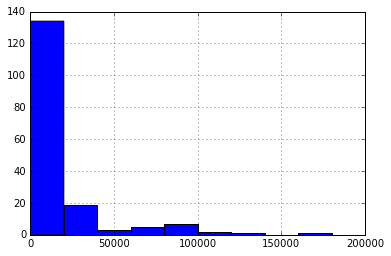

In [101]:
recent_grads['Men'].hist(range=(0,200000))

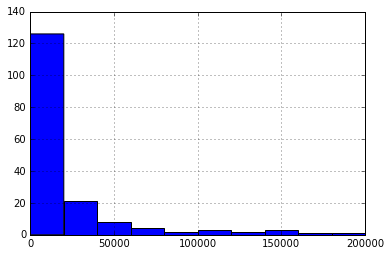

In [102]:
recent_grads['Women'].hist(range=(0,200000))

Seems like the number of male and female graduates are roughly similar.

While we're at this gender-related data, let's check what majors are mostly popular among men and women.

In [117]:
the_girl_major = recent_grads[recent_grads["Women"] >= 0.9]
the_girl_major.sort_values(by='Women', ascending=False).head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,...,115172,174438,28169,0.083811,31500,24000,41000,125148,141860,48207
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,40818,122817,8497,0.044863,48000,39000,58000,151643,26146,6193
123,124,3600,BIOLOGY,280709.0,111762.0,168947.0,Biology & Life Science,0.601858,1370,182295,...,72371,100336,13874,0.070725,33400,24000,45000,88232,81109,28339
138,139,2304,ELEMENTARY EDUCATION,170862.0,13029.0,157833.0,Education,0.923745,1629,149339,...,37965,86540,7297,0.046586,32000,23400,38000,108085,36972,11502
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395


In [118]:
the_guy_major = recent_grads[recent_grads["Men"] >= 0.9]
the_guy_major.sort_values(by='Men', ascending=False).head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395
57,58,6200,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.436302,2380,190183,...,36241,138299,14946,0.072861,40000,30000,55000,29334,100831,27320
35,36,6207,FINANCE,174506.0,115030.0,59476.0,Business,0.340825,2189,145696,...,21463,108595,9413,0.060686,47000,35000,64000,24243,48447,9910
123,124,3600,BIOLOGY,280709.0,111762.0,168947.0,Biology & Life Science,0.601858,1370,182295,...,72371,100336,13874,0.070725,33400,24000,45000,88232,81109,28339
20,21,2102,COMPUTER SCIENCE,128319.0,99743.0,28576.0,Computers & Mathematics,0.222695,1196,102087,...,18726,70932,6884,0.063173,53000,39000,70000,68622,25667,5144


It's interesting to see that 'Business Management and Administration' and 'Biology' shared the same love from both males and females graduates!


---

## The all-in-one scatter matrix plot!

Ok, there are so many plots up there. How about we group some of the important ones?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ea4e87278>,
      dtype=object)

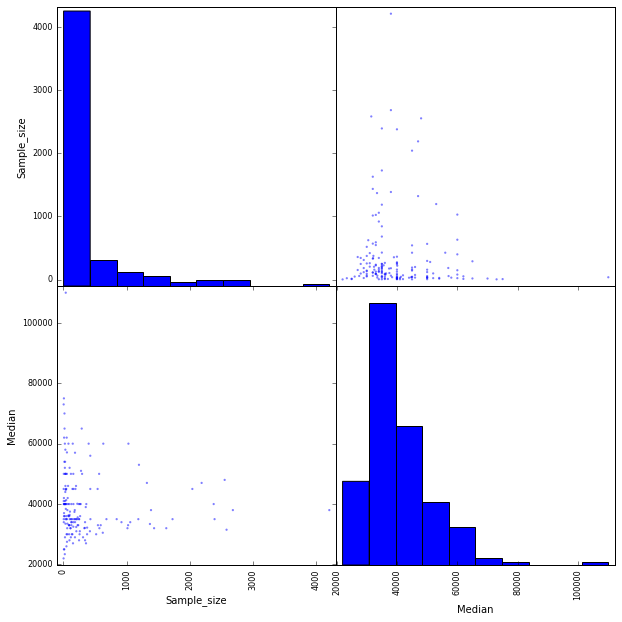

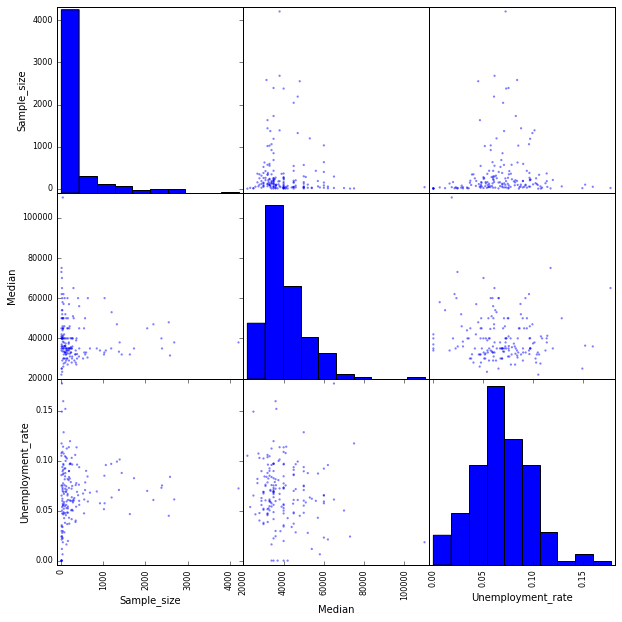

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

Just like the individual plots, these scatter matrix plots show no strong relationships between the data points.

---

## The (candy-)bar plots

Let's play around with the bar plots that have colors like strawberry, lemon, grape and bubble gum candies. 

How about I created one vertical and one horizontal, and keep the one that looks nice for my eyes?

Here goes nothing!

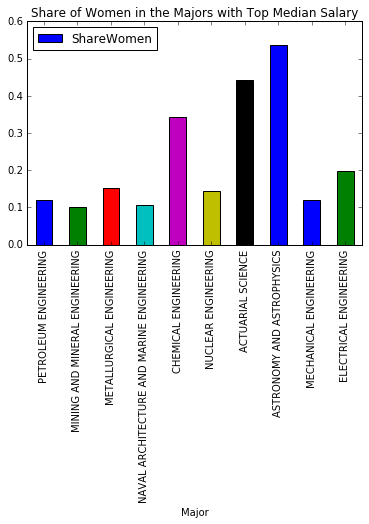

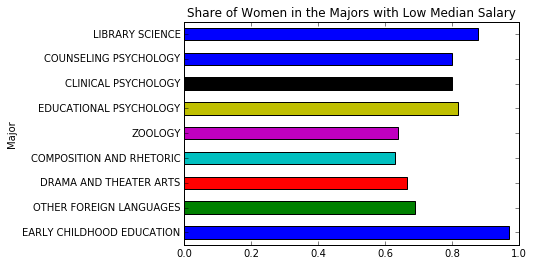

In [113]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', title='Share of Women in the Majors with Top Median Salary')
recent_grads[163:].plot.barh(x='Major', y='ShareWomen', title='Share of Women in the Majors with Low Median Salary', legend=False)

Oookay, clearly the horizontal one is easier for my already tired eyes LOL, can't rotate my head 90 degrees anymore.

As a female, the results are quite disappointing but not surprising. The share of women in the top median salary are lower than the low median salary. 

But I'm surprised that 'Astronomy and Astrophysics' has over 50% of female graduates! Oh wow, now I'm nervous, should I get that magic code?

Now, let's see the unemployment rate for top and bottom majors.

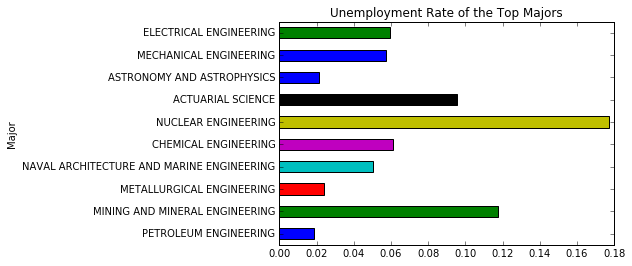

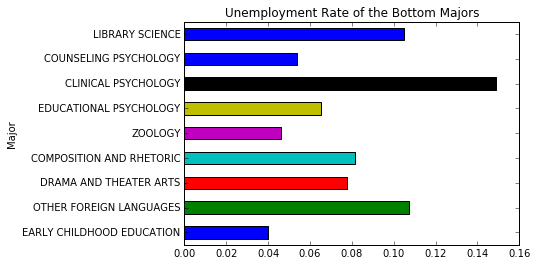

In [114]:
recent_grads[:10].plot.barh(x='Major', y='Unemployment_rate', title='Unemployment Rate of the Top Majors', legend=False)
recent_grads[163:].plot.barh(x='Major', y='Unemployment_rate', title='Unemployment Rate of the Bottom Majors', legend=False)

This is again surprising for me!
1. 'Astronomy and Astrophysics' has the second lowest unemployment rate. Is this a sign?! And I though 'Nuclear Engineering' is pretty in-demand!
2. 'Clinical Psychology' has the highest unemployment rate in the bottom rate majors. This is really sad, because people are stressed all the time. On second thought, maybe people who are having mental health issue go straight to a psychiatrist rather than a psychologist.

---

## Fancy plots coming right up!

Now that I have way too many plots already, why don't I just ADD. SOME. MORE.


### Revisiting that guy vs girl majors
This time let's use that `Major_category` column for some variety.

In [133]:
major_category = recent_grads["Major_category"].unique()

gal_category = {}
guy_category = {}

for c in major_category:
    gal_sum = recent_grads.loc[recent_grads["Major_category"] == c, "Women"].sum()
    guy_sum = recent_grads.loc[recent_grads["Major_category"] == c, "Men"].sum()
    guy_category[c] = guy_sum
    gal_category[c] = gal_sum

gal_series = pd.Series(gal_category)
guy_series = pd.Series(guy_category)

major_categories = pd.DataFrame(gal_series, columns=['Women'])
major_categories['Men'] = guy_series
major_categories

,Women,Men
Agriculture & Natural Resources,35263.0,40357.0
Arts,222740.0,134390.0
Biology & Life Science,268943.0,184919.0
Business,634524.0,667852.0
Communications & Journalism,260680.0,131921.0
Computers & Mathematics,90283.0,208725.0
Education,455603.0,103526.0
Engineering,129276.0,408307.0
Health,387713.0,75517.0
Humanities & Liberal Arts,440622.0,272846.0


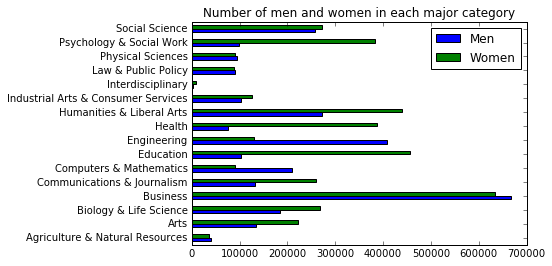

In [186]:
guy_gal_major_categories = major_categories[["Men", "Women"]]
guy_gal_major_categories.plot.barh(title = 'Number of men and women in each major category')

The highest gap can be seen in:
- Psychology & Social Work
- Humanities & Liberal Arts
- Health
- Engineering
- Education
- Computers & Mathematics
- Communications & Journalism

I must say that the typical 'female major' and 'male major' are clearly seen here. I'm not sure why, but in my country, gender plays a huge role in job acceptance related to these majors, so maybe that's one reason why some majors are popular among certain genders.

### No, no, no, I haven't forgotten about you, dear box plot!

Let's reconfirm the above plots about median salary and employment rate.

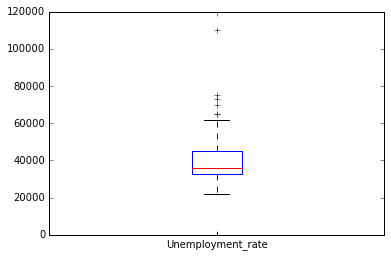

In [140]:
recent_grads['Median'].plot(kind='box')

Some outliers can be seen, but the median salary mirrors one of the plots above: around $30,000-40,000.

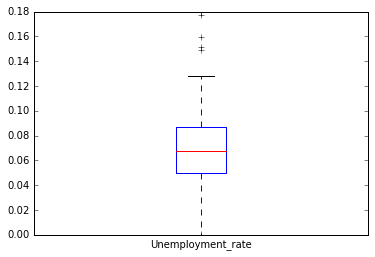

In [141]:
recent_grads['Unemployment_rate'].plot(kind='box')

The median unemployment rate also resembles one of the plots way up above (7%), with several outliers on the higher ends (13-18%).

### Unleash the hexbins!

Because more plots are fantastic, and I love plots. Especially the pastel-colored ones (dark-colored plots scare me, I know, again, don't judge me).

Let's confirm those dense scatter plots with pretty hexbins:
- `Full_time` and `Median`
- `Sample_size` and `Unemployment_rate`
- `ShareWomen` and `Unemployment_rate`

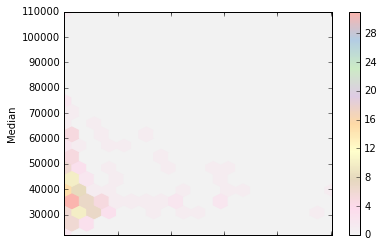

In [182]:
recent_grads.plot.hexbin(x='Full_time', y='Median', gridsize=18, cmap="Pastel1_r")

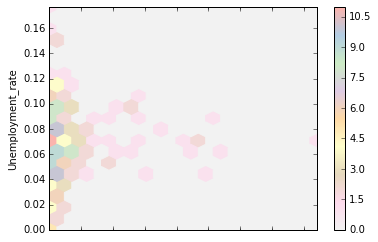

In [183]:
recent_grads.plot.hexbin(x='Sample_size', y='Unemployment_rate', gridsize=18, cmap="Pastel1_r")

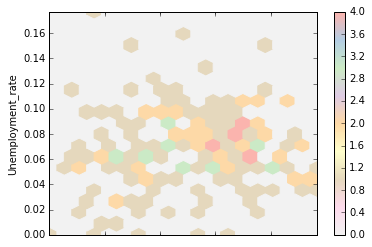

In [184]:
recent_grads.plot.hexbin(x='ShareWomen', y='Unemployment_rate', gridsize=18, cmap="Pastel1_r")

Yup, after confirming over and over again, the median salary and unemployment rate are just the same. And yes, there is no significant relationship between `ShareWomen` and `Unemployment_rate`, so that's great.

---

## Conclusion

So, yeah. If that magic code is real, I'll use it and get myself an 'Astronomy and Astrophysics' degree for every reason stated above, and stargazing is actually my real hobby :D

--

Me: "You were joking with me, right? About that magic code?"

Imaginary Colleague: "..."

Me: "What?"

Imaginary Colleague: "You think I was being serious?"

Me: "No."

Imaginary Colleague: "But you did some analysis."

Me: "Yeah. I mean, no. No."

Imaginary Colleague: "You DID."

Me: "NO."

Imaginary Colleague: "Don't worry, I'm not gonna tell anyone LOL"

Me: "Nooo I hate you!"